https://www.kaggle.com/datasets/malaiarasugraj/global-health-statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [2]:
tipo_transformacao = 'standardization' #'standardization', 'minmax' ou 'robust'

In [3]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('./Dados/Global Health Statistics.csv')

In [5]:
df.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,57.74,3.34,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,89.21,1.33,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,56.41,4.07,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,85.20,3.18,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,67.00,4.61,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


In [6]:
df.shape

(1000000, 22)

In [7]:
df.isnull().sum()

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64

# Verificar países

In [8]:
df['Country'].unique()

array(['Italy', 'France', 'Turkey', 'Indonesia', 'Saudi Arabia', 'USA',
       'Nigeria', 'Australia', 'Canada', 'Mexico', 'China',
       'South Africa', 'Japan', 'UK', 'Russia', 'Brazil', 'Germany',
       'India', 'Argentina', 'South Korea'], dtype=object)

# Filtrar Doença de Parkinson no Brasil

In [9]:
df[df['Country'] == 'Brazil'].head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
33,Brazil,2003,Parkinson's Disease,Viral,13.85,4.52,3.23,61+,Male,700175,62.54,3.25,5.22,Medication,33734,Yes,75.62,4468,9.79,11089,0.48,24.44
35,Brazil,2011,Parkinson's Disease,Neurological,6.42,10.08,0.29,0-18,Other,136567,50.48,3.07,8.06,Surgery,18886,Yes,80.20,1595,5.37,41181,0.73,25.31
45,Brazil,2003,Alzheimer's Disease,Neurological,12.50,13.27,9.34,19-35,Male,280906,89.39,3.91,5.60,Surgery,16622,Yes,87.39,326,1.16,32806,0.61,70.08
46,Brazil,2010,HIV/AIDS,Autoimmune,0.13,13.99,1.46,36-60,Female,134964,69.35,5.00,0.55,Vaccination,14688,Yes,61.60,1804,7.23,57996,0.79,42.37
62,Brazil,2013,Ebola,Metabolic,16.01,8.55,1.35,19-35,Male,384573,81.59,3.08,3.16,Medication,18972,No,70.43,3356,8.75,14196,0.81,63.55


In [10]:
df_pk_br = df[(df['Country'] == 'Brazil') & (df['Disease Name'] == "Parkinson's Disease") & (df['Disease Category'] == 'Neurological')].copy()
df_pk_br.reset_index(drop=True, inplace=True)

In [11]:
df_pk_br.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Brazil,2011,Parkinson's Disease,Neurological,6.42,10.08,0.29,0-18,Other,136567,50.48,3.07,8.06,Surgery,18886,Yes,80.20,1595,5.37,41181,0.73,25.31
1,Brazil,2018,Parkinson's Disease,Neurological,0.18,13.64,0.76,19-35,Female,54158,83.25,1.09,3.94,Medication,9737,Yes,85.90,3525,6.42,7889,0.77,33.95
2,Brazil,2002,Parkinson's Disease,Neurological,9.04,12.78,3.22,36-60,Other,633607,89.13,2.82,4.07,Medication,22286,No,89.50,930,6.52,45671,0.89,24.43
3,Brazil,2021,Parkinson's Disease,Neurological,8.73,9.15,1.05,0-18,Female,903102,60.84,1.21,9.43,Surgery,13021,Yes,88.86,2774,9.39,73914,0.63,64.01
4,Brazil,2000,Parkinson's Disease,Neurological,9.60,9.50,2.39,0-18,Other,98269,63.37,4.81,3.63,Surgery,24505,Yes,86.64,1764,5.01,3036,0.68,21.77


# Separar colunas

In [12]:
colunas_a_remover = ['Country', 'Year', 'Disease Name', 'Disease Category']
colunas_categoricas = ['Age Group', 'Gender', 'Treatment Type', 'Availability of Vaccines/Treatment']
coluna_alvo = 'Mortality Rate (%)'

In [13]:
df_pk_br_raw = df_pk_br.drop(columns=colunas_a_remover, axis=1).copy()

## Remover desnecessárias

In [14]:
df_pk_br_raw.head()

,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,6.42,10.08,0.29,0-18,Other,136567,50.48,3.07,8.06,Surgery,18886,Yes,80.20,1595,5.37,41181,0.73,25.31
1,0.18,13.64,0.76,19-35,Female,54158,83.25,1.09,3.94,Medication,9737,Yes,85.90,3525,6.42,7889,0.77,33.95
2,9.04,12.78,3.22,36-60,Other,633607,89.13,2.82,4.07,Medication,22286,No,89.50,930,6.52,45671,0.89,24.43
3,8.73,9.15,1.05,0-18,Female,903102,60.84,1.21,9.43,Surgery,13021,Yes,88.86,2774,9.39,73914,0.63,64.01
4,9.60,9.50,2.39,0-18,Other,98269,63.37,4.81,3.63,Surgery,24505,Yes,86.64,1764,5.01,3036,0.68,21.77


# Matriz de correlação dos dados

<Axes: >

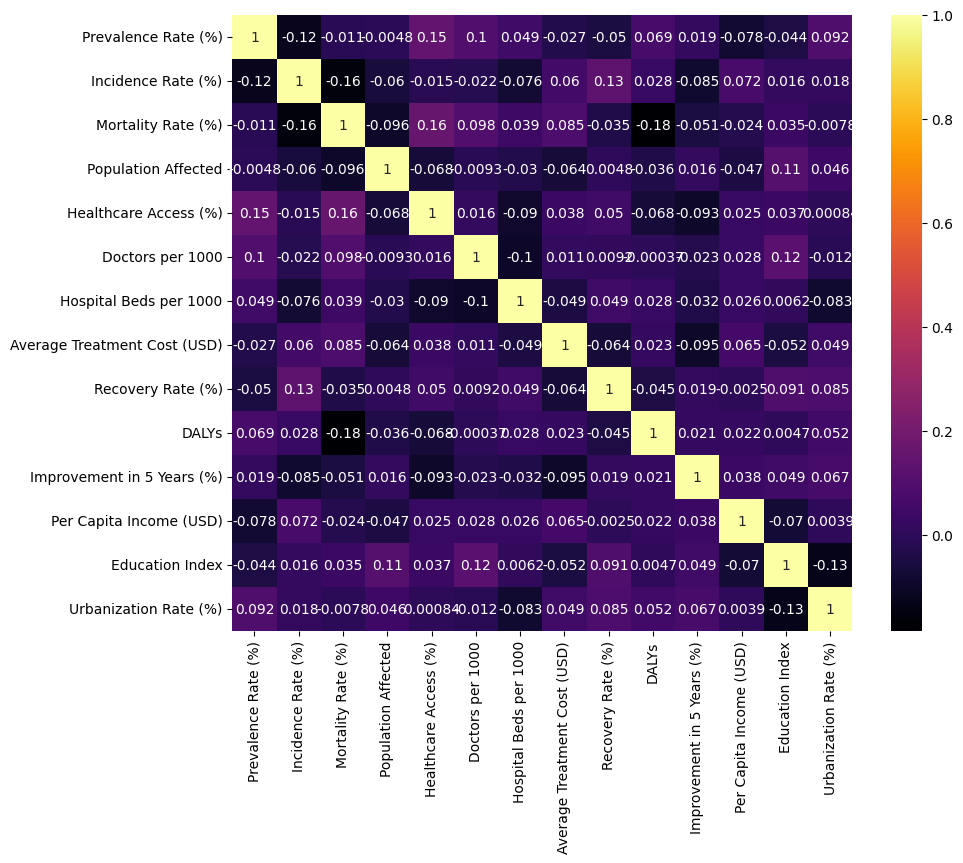

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_pk_br_raw.drop(colunas_categoricas, axis=1).corr(), annot=True, cmap='inferno')

# Aplicar One-Hot-Encoding

In [16]:
df_categoricas = pd.get_dummies(df_pk_br_raw[colunas_categoricas], drop_first=True, dtype=int).copy()

In [17]:
df_pk_br_raw.drop(colunas_categoricas, axis=1, inplace=True)
df_pk_br_raw = pd.concat([df_pk_br_raw, df_categoricas], axis=1)

In [18]:
df_pk_br_raw.head()

,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Average Treatment Cost (USD),Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%),Age Group_19-35,Age Group_36-60,Age Group_61+,Gender_Male,Gender_Other,Treatment Type_Surgery,Treatment Type_Therapy,Treatment Type_Vaccination,Availability of Vaccines/Treatment_Yes
0,6.42,10.08,0.29,136567,50.48,3.07,8.06,18886,80.20,1595,5.37,41181,0.73,25.31,0,0,0,0,1,1,0,0,1
1,0.18,13.64,0.76,54158,83.25,1.09,3.94,9737,85.90,3525,6.42,7889,0.77,33.95,1,0,0,0,0,0,0,0,1
2,9.04,12.78,3.22,633607,89.13,2.82,4.07,22286,89.50,930,6.52,45671,0.89,24.43,0,1,0,0,1,0,0,0,0
3,8.73,9.15,1.05,903102,60.84,1.21,9.43,13021,88.86,2774,9.39,73914,0.63,64.01,0,0,0,0,0,1,0,0,1
4,9.60,9.50,2.39,98269,63.37,4.81,3.63,24505,86.64,1764,5.01,3036,0.68,21.77,0,0,0,0,1,1,0,0,1


# Separar os dados em treino e teste

In [19]:
X = df_pk_br_raw.drop(coluna_alvo, axis=1).copy()
y = df_pk_br_raw[coluna_alvo].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Aplicar Scaler aos dados

In [21]:
if tipo_transformacao == 'standardization':
    scaler = StandardScaler()
elif tipo_transformacao == 'minmax':
    scaler = MinMaxScaler()
else:
    scaler = RobustScaler()

In [22]:
data_scaled_train = scaler.fit_transform(X_train.drop(df_categoricas.columns, axis=1))
df_scaled_train = pd.DataFrame(data_scaled_train, columns=X_train.drop(df_categoricas.columns, axis=1).columns)
df_transformed_train = pd.concat([df_scaled_train, X_train[df_categoricas.columns]], axis=1)

data_scaled_test = scaler.transform(X_test.drop(df_categoricas.columns, axis=1))
df_scaled_test = pd.DataFrame(data_scaled_test, columns=X_test.drop(df_categoricas.columns, axis=1).columns)
df_transformed_test = pd.concat([df_scaled_test, X_test[df_categoricas.columns]], axis=1)

In [23]:
df_transformed_train.head()

,Prevalence Rate (%),Incidence Rate (%),Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Average Treatment Cost (USD),Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%),Age Group_19-35,Age Group_36-60,Age Group_61+,Gender_Male,Gender_Other,Treatment Type_Surgery,Treatment Type_Therapy,Treatment Type_Vaccination,Availability of Vaccines/Treatment_Yes
0,-0.715043,1.333327,0.855659,-1.593005,-0.957762,-1.048770,0.244342,1.062233,-1.447746,0.668154,-1.693691,1.411099,-0.622433,1,0,0,0,0,0,0,1,0
1,0.901587,0.668614,1.289532,-1.074983,-1.434733,-1.146386,-0.109799,1.546731,0.277042,0.271060,-1.393818,-0.302191,1.613062,1,0,0,0,1,0,0,1,1
2,-1.219362,0.805988,1.338820,-0.511272,-0.828414,-1.006935,0.528219,-0.529278,-1.376417,-0.856967,0.787869,-0.587739,1.226904,1,0,0,0,0,0,1,0,1
3,1.593927,1.180443,-0.278839,1.176002,-1.661092,-1.233543,-1.098590,-1.115132,1.836408,-0.347422,-1.631337,1.696648,-0.238789,1,0,0,0,0,0,0,1,1
4,-1.549717,1.481779,-1.507730,1.107146,-0.294852,-1.582171,-1.444343,1.109677,0.963012,0.587330,1.705312,-0.659126,1.474287,0,0,1,1,0,0,1,0,1


In [24]:
df_transformed_test.head()

,Prevalence Rate (%),Incidence Rate (%),Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Average Treatment Cost (USD),Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%),Age Group_19-35,Age Group_36-60,Age Group_61+,Gender_Male,Gender_Other,Treatment Type_Surgery,Treatment Type_Therapy,Treatment Type_Vaccination,Availability of Vaccines/Treatment_Yes
0,-0.978624,0.422670,0.204723,-0.536368,-1.564081,0.593266,-1.554072,0.977410,0.563116,1.276094,0.487311,0.197519,-1.523470,0,0,0,0,0,0,1,0,0
1,-0.606096,0.083667,1.414179,0.952061,1.273494,-1.331159,0.329939,-0.034716,-0.689689,0.372969,1.392722,1.339712,-1.464641,0,0,0,0,1,0,0,0,1
2,0.885773,-0.536732,-1.448931,1.266093,-0.335274,-1.275378,-1.186592,1.240506,0.449293,0.608414,-0.561352,-1.515771,1.395345,0,0,1,0,0,0,0,1,1
3,1.026349,1.277934,-1.347079,1.544087,-0.044240,0.826846,0.161015,0.906964,0.848430,-1.661697,-0.804528,0.197519,-1.458607,0,0,0,1,0,0,0,1,1
4,0.887530,-0.456966,0.127401,0.444979,-1.143700,1.471808,0.543826,1.184436,-1.637450,0.295659,-1.594007,-0.659126,-1.485256,0,0,1,0,1,0,0,1,1


In [25]:
y_train.head()

0    7.87
1    0.32
2    7.54
3    0.29
4    0.19
Name: Mortality Rate (%), dtype: float64

In [26]:
y_test.head()

0    6.48
1    2.26
2    6.69
3    9.96
4    4.66
Name: Mortality Rate (%), dtype: float64

In [27]:
print(f'{df_transformed_train.shape[0]} registros no conjunto de treino e {df_transformed_test.shape[0]} registros no conjunto de teste.')

163 registros no conjunto de treino e 71 registros no conjunto de teste.


# Ajustar os algoritmos

In [28]:
#model = DecisionTreeRegressor(random_state=0)
model = RandomForestRegressor(random_state=0)

In [29]:
model.fit(df_transformed_train, y_train)

RandomForestRegressor(random_state=0)

In [30]:
y_pred_train = model.predict(df_transformed_train)
y_pred_test = model.predict(df_transformed_test)

In [31]:
r2_train = np.round(r2_score(y_train, y_pred_train),4)
r2_test = np.round(r2_score(y_test, y_pred_test),4)

mape_train = np.round(mean_absolute_percentage_error(y_train, y_pred_train),4)
mape_test = np.round(mean_absolute_percentage_error(y_test, y_pred_test),4)

In [32]:
print(f'R2 no conjunto de treino: {r2_train}')
print(f'R2 no conjunto de teste: {r2_test}')
print(f'MAPE no conjunto de treino: {mape_train}')
print(f'MAPE no conjunto de teste: {mape_test}')

R2 no conjunto de treino: 0.8741
R2 no conjunto de teste: -0.0846
MAPE no conjunto de treino: 0.6487
MAPE no conjunto de teste: 0.9839
